In [14]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

# output = MultiParamOutputLoader("/nfs01/covid_sims/1591720627.0466504-test_protocol_QFNR/")
output = MultiParamOutputLoader("/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/sim_output/1595445187.168576-test_population_fraction")

/Users/stevewangen/projects/COVID/uw_reopening/src/simulations_v2/multiparam_output_loader.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  param_specifier = yaml.load(f)


In [15]:
output.param_scenarios

['Nominal Parameters']

In [17]:
output.sim_results

{'Nominal Parameters': {(0.008928571429,): [         S   QS    QI      R  E_0  E_1  E_2  E_3  E_4  E_5  ...  \
   0    34279    0     0      0    0    0    0    0    0    0  ...   
   1    34270    0     1      0    1    2    1    1    1    0  ...   
   2    34251    5     1      0    5    3    5    3    2    0  ...   
   3    34239    3     3      0    9    6    7    3    1    0  ...   
   4    34222    5     5      0   11   15    3    2    0    0  ...   
   ..     ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   
   108  11072  158  2055  20854    7    6    2    0    0    1  ...   
   109  11089  134  1968  20966    7    4    2    0    0    0  ...   
   110  11061  146  1899  21064    3    4    3    2    2    0  ...   
   111  11067  124  1816  21160    9    5    7    1    1    0  ...   
   112  11088   96  1742  21250    7    9    1    0    0    0  ...   
   
        SyID_severe_17  SyID_severe_18  SyID_severe_19  cumulative_mild  \
   0                 0               0  

In [27]:
output.sim_results['Nominal Parameters'][(0.008928571429,)][0].columns

Index(['S', 'QS', 'QI', 'R', 'E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6',
       'pre_ID_0', 'pre_ID_1', 'pre_ID_2', 'pre_ID_3', 'ID_0', 'ID_1', 'ID_2',
       'ID_3', 'ID_4', 'ID_5', 'ID_6', 'ID_7', 'SyID_mild_0', 'SyID_mild_1',
       'SyID_mild_2', 'SyID_mild_3', 'SyID_mild_4', 'SyID_mild_5',
       'SyID_mild_6', 'SyID_mild_7', 'SyID_mild_8', 'SyID_mild_9',
       'SyID_mild_10', 'SyID_mild_11', 'SyID_mild_12', 'SyID_mild_13',
       'SyID_mild_14', 'SyID_mild_15', 'SyID_mild_16', 'SyID_mild_17',
       'SyID_mild_18', 'SyID_mild_19', 'SyID_severe_0', 'SyID_severe_1',
       'SyID_severe_2', 'SyID_severe_3', 'SyID_severe_4', 'SyID_severe_5',
       'SyID_severe_6', 'SyID_severe_7', 'SyID_severe_8', 'SyID_severe_9',
       'SyID_severe_10', 'SyID_severe_11', 'SyID_severe_12', 'SyID_severe_13',
       'SyID_severe_14', 'SyID_severe_15', 'SyID_severe_16', 'SyID_severe_17',
       'SyID_severe_18', 'SyID_severe_19', 'cumulative_mild',
       'cumulative_severe', 'cumulative_outside

In [23]:
from deprecated.params import ParamConfig

# Massey's suggestion (but syntax looks different)
# from load_params import load_params

base_params = ParamConfig.load_config('fall', True, 'nominal')
params = base_params.copy()

In [24]:
cumulative_cols = ['QI','R'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
recovered_cols = ['R']
active_cols = ['QI'] + ['E_{}'.format(x) for x in range(params['max_time_exposed'])] + \
                ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]
free_infectious = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
                ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])] + \
                ['SyID_mild_{}'.format(x) for x in range(params['max_time_SyID_mild'])] + \
                ['SyID_severe_{}'.format(x) for x in range(params['max_time_SyID_severe'])]

In [11]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, get_active_infection_cols, get_pop_size,\
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

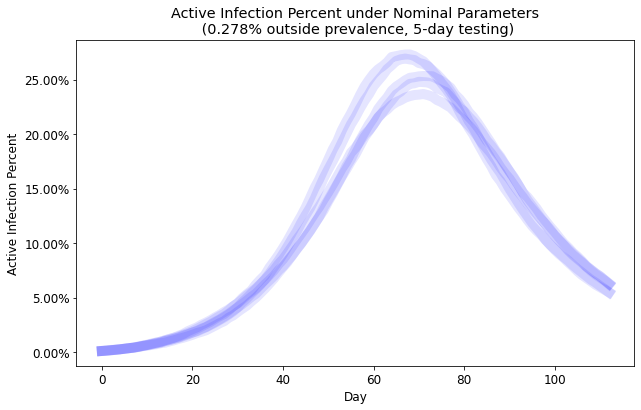

In [25]:
dfs=output.sim_results['Nominal Parameters'][(0.008928571429,)]

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
aip_cols = list(get_active_infection_cols(dfs[0]))
pop_size = get_pop_size(dfs[0])
for df in dfs:
    aip = df[aip_cols].sum(axis=1) / pop_size
    ax.plot(aip, linewidth=10, alpha=0.1, color='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Active Infection Percent')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax.set_title('Active Infection Percent under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)')
plt.show()

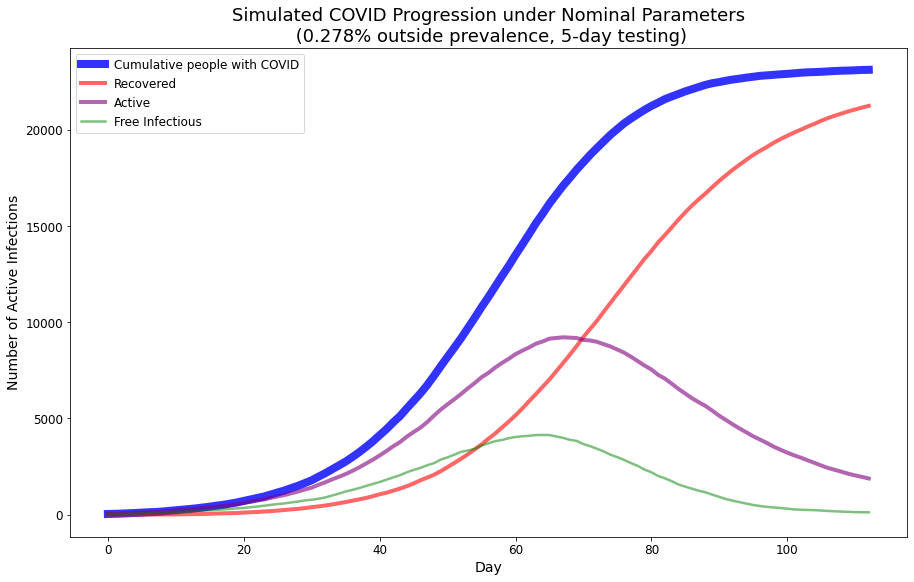

In [26]:
plt.figure(figsize=(15,9))
sample = dfs[0]

plt.plot(sample[cumulative_cols].sum(axis=1), linewidth=8.0, alpha=0.8, color='blue')
plt.plot(sample[recovered_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='red')
plt.plot(sample[active_cols].sum(axis=1), linewidth=4.0, alpha=0.6, color='purple')
plt.plot(sample[free_infectious].sum(axis=1), linewidth=2.5, alpha=0.5, color='green')
plt.xlabel("Day", size=14)
plt.ylabel("Number of Active Infections", size=14)
plt.title('Simulated COVID Progression under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
plt.legend(('Cumulative people with COVID', 'Recovered', 'Active', 'Free Infectious'), loc='best')
#sample_high

Text(0, 0.5, 'Cumulative People in each severity class')

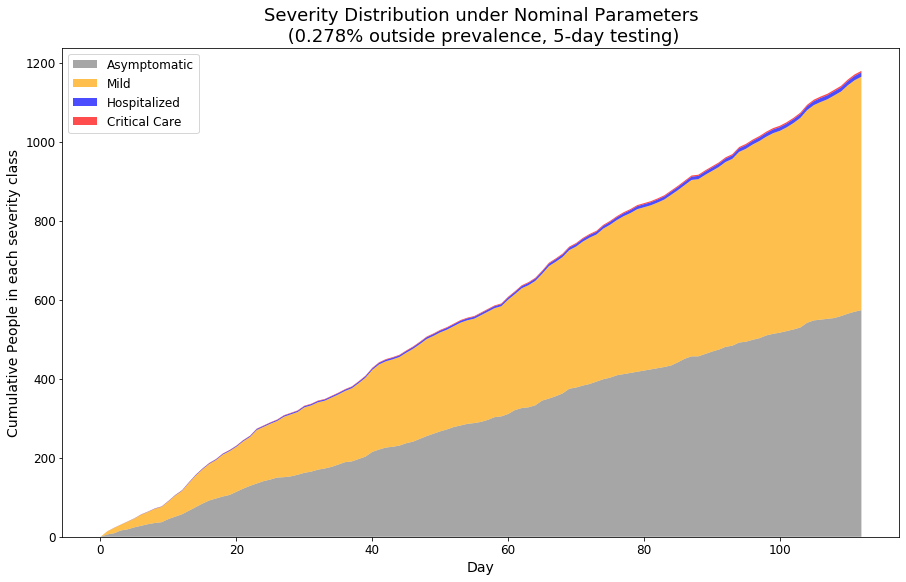

In [25]:
df_0 = sample

# Metric: Area graph of the number of people in each severity state
plt.figure(figsize=(15,9))
y0 = list(df_0['severity_0'])
y1 = list(df_0['severity_1'])
y2 = list(df_0['severity_2'])
y3 = list(df_0['severity_3'])
x = list(range(len(list(df_0['severity_0']))))

plt.stackplot(x, y0,y1,y2,y3, labels=['Asymptomatic','Mild','Hospitalized','Critical Care'], alpha=0.7, colors=['grey', 'orange', 'blue', 'red']*10)
plt.legend(loc='upper left')
plt.title('Severity Distribution under Nominal Parameters\n (0.278% outside prevalence, 5-day testing)', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Cumulative People in each severity class', size=14)

# print(list(df_0['severity_0']), list(df_0['severity_1']), list(df_0['severity_2']), list(df_0['severity_3']))
# print(list(range(len(list(df_0['severity_0'])))))